# Day 3 Exercise - Analyzing and interpreting time series

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import keyring
import time
import os

#### Data Prep

In [21]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [22]:
df.columns

Index(['position', 'track_id', 'track_name', 'artist', 'streams'], dtype='object')

In [23]:
artist_name = "Zack Tabudlo"

In [24]:
artist_df = df[df["artist"]==artist_name]
artist_df

,position,track_id,track_name,artist,streams
date,,,,,
2021-04-06,139,1dcNEEtODRVZEevQ20Cgmy,Nangangamba,Zack Tabudlo,32457
2021-04-07,40,2X5AFygz5SDYlXagyPw8kX,Binibini,Zack Tabudlo,70317
2021-04-07,44,1dcNEEtODRVZEevQ20Cgmy,Nangangamba,Zack Tabudlo,68316
2021-04-08,11,1dcNEEtODRVZEevQ20Cgmy,Nangangamba,Zack Tabudlo,118157
2021-04-08,18,2X5AFygz5SDYlXagyPw8kX,Binibini,Zack Tabudlo,113402
...,...,...,...,...,...
2022-09-15,33,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,129232
2022-09-15,38,5MYPzdIWgx3pMLRGlq2fVq,Asan Ka Na Ba,Zack Tabudlo,121873
2022-09-15,65,55RMhrPQYA6vLu5YMgXxFD,Binibini,Zack Tabudlo,87255


In [25]:
#get total monthly streams
day_df = artist_df['streams'].resample('D').sum() #M for month
day_df

date
2021-04-06     32457
2021-04-07    138633
2021-04-08    231559
2021-04-09    316114
2021-04-10    352410
               ...  
2022-09-11    614267
2022-09-12    613538
2022-09-13    609176
2022-09-14    600998
2022-09-15    612939
Freq: D, Name: streams, Length: 528, dtype: int64

In [26]:
# read and process the playlist data for keyword
artist_name_df = pd.read_csv(KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv(KEYWORD1+'_playlist_tracks.csv')\
                       [['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks1_df['duration_mins'] = tracks1_df['duration'] / 60000
#tag genre with keyword
tracks1_df['genre'] = KEYWORD1
tracks1_df.head()

NameError: name 'KEYWORD1' is not defined

In [27]:
for col in ['popularity', 'danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo']:
    sns.distplot(artist_df[col])
    plt.ylabel('Frequency')
    plt.show()

KeyError: 'popularity'

Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

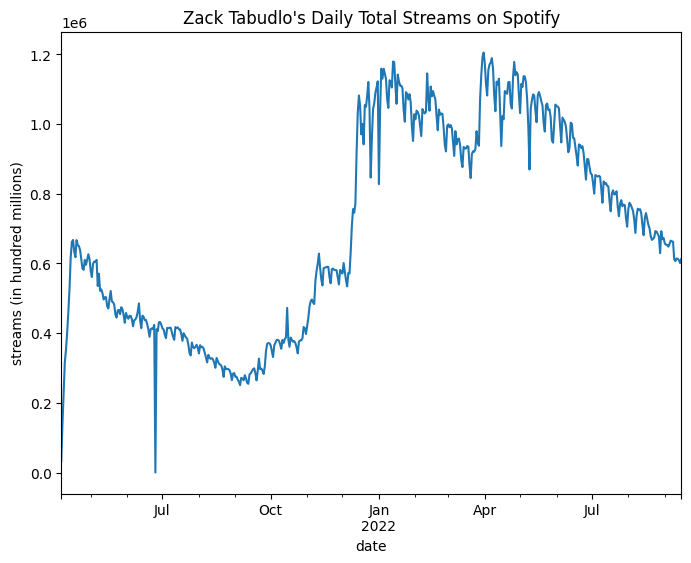

In [38]:
#line chart of monthly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
day_df.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in day_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title(artist_name + "'s Daily Total Streams on Spotify")

In [39]:
# day - previous day
delta_day_df = day_df.diff()
delta_day_df

date
2021-04-06         NaN
2021-04-07    106176.0
2021-04-08     92926.0
2021-04-09     84555.0
2021-04-10     36296.0
                ...   
2022-09-11      7551.0
2022-09-12      -729.0
2022-09-13     -4362.0
2022-09-14     -8178.0
2022-09-15     11941.0
Freq: D, Name: streams, Length: 528, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\3853502886.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([x.strftime('%Y-%m') for x in day_df.index])


Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

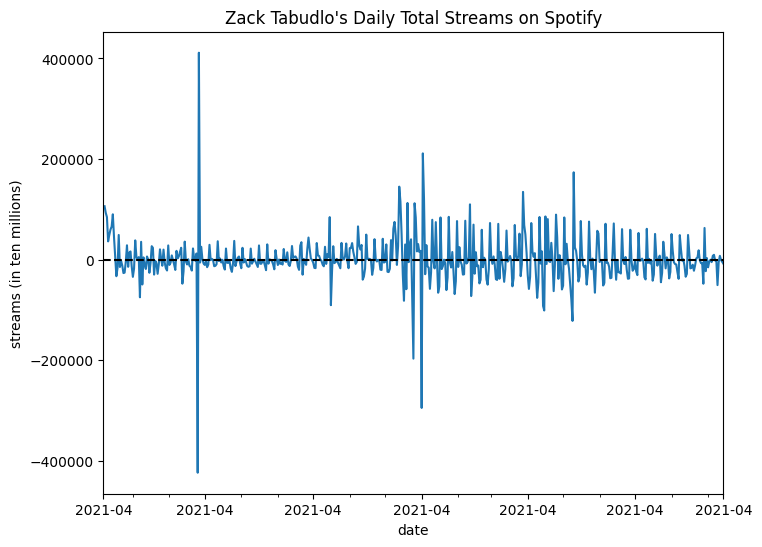

In [40]:
#line chart of daily streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
#omit incomplete month
delta_day_df[:-1].plot(ax=ax)

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y-%m') for x in day_df.index])

#add reference line at y=0
plt.axhline(0, color='k', ls='--')

plt.ylabel('streams (in ten millions)')
plt.title(artist_name + "'s Daily Total Streams on Spotify")

Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

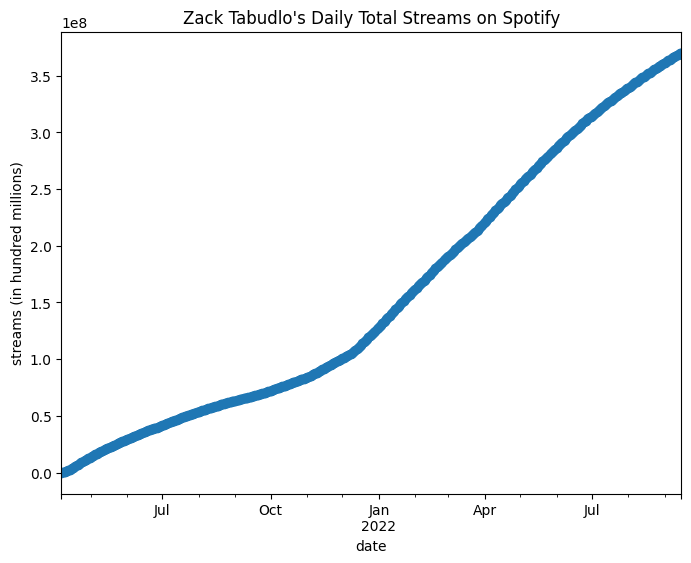

In [41]:
#line chart of daily streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data = df[df['artist']==artist_name]['streams'].resample('D').sum().cumsum()

data.plot(ax=ax,marker='o')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in day_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title(artist_name + "'s Daily Total Streams on Spotify")

In [42]:
pd.date_range(data.index.min(), data.index.max())

DatetimeIndex(['2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15',
               ...
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
               '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15'],
              dtype='datetime64[ns]', length=528, freq='D')

In [43]:
data = df[(df.index.year==2021)&(df['artist']==artist_name)][['streams']]
data = data['2021-08-30':]
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
complete_dates

""
date
2021-08-30
2021-08-31
2021-09-01
2021-09-02
2021-09-03
...
2021-12-27
2021-12-28
2021-12-29


Text(0.5, 1.0, 'Spotify Daily Streams: Zack Tabudlo')

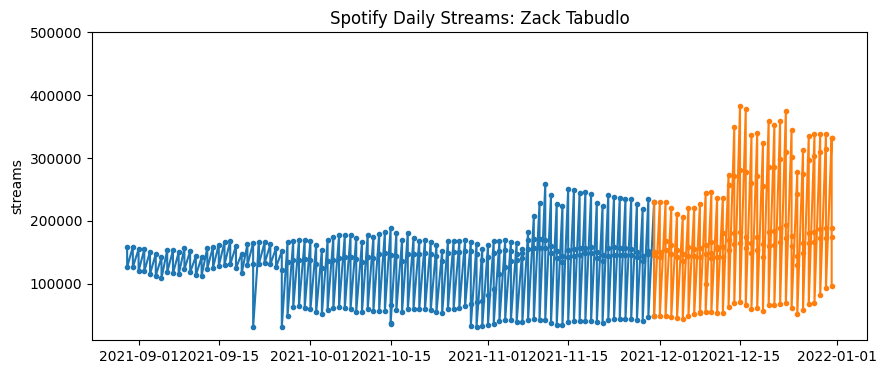

In [44]:
fig,ax = plt.subplots(figsize=(10,4))
data = df[(df.index.year==2021)&(df['artist']==artist_name)][['streams']]
data = data['2021-08-30':]
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2021-11-30'], marker='.')
ax.plot(data['2021-11-30':], marker='.')

plt.ylim([10000,500000])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Streams: ' + artist_name)


Static Bounds

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

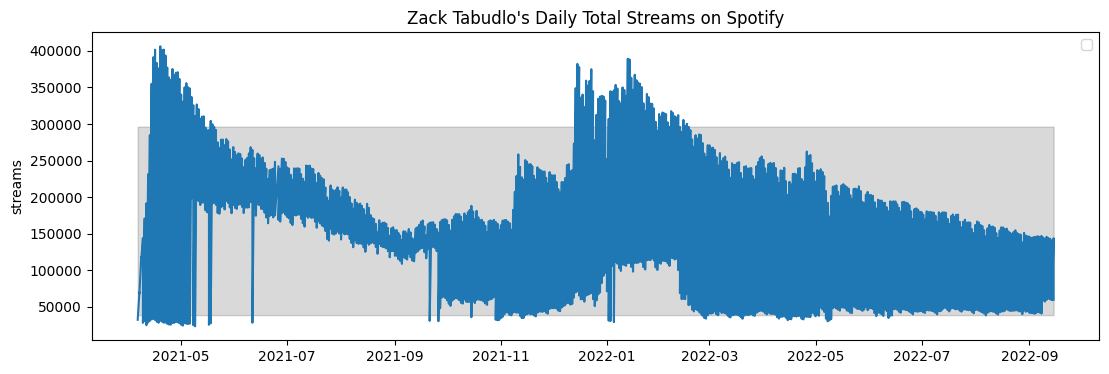

In [45]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data = df[(df.index.year>=2019)&(df['artist']==artist_name)]['streams']
ub_data = [data.quantile(0.95)]*len(data)
lb_data = [data.quantile(0.05)]*len(data)

plt.plot(data)# #label='Ariana Grande')
plt.fill_between(data.index, lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title(artist_name + "'s Daily Total Streams on Spotify")

Windowed Bounds

1. Quantile-based bounds

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

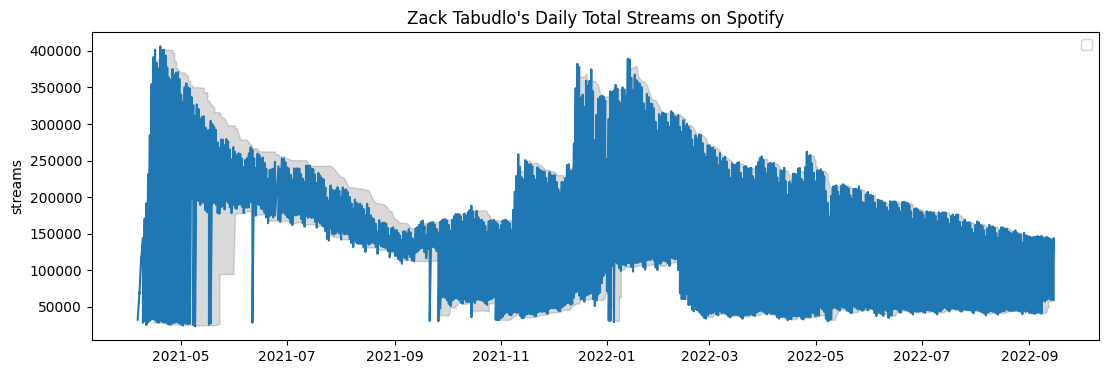

In [46]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 30
data = df[(df.index.year>=2019)&(df['artist']==artist_name)]['streams']
ub_data = data.rolling(BOUNDS_WINDOW).quantile(0.95)
lb_data = data.rolling(BOUNDS_WINDOW).quantile(0.05)

plt.plot(data)#, label='Ariana Grande')
plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title(artist_name + "'s Daily Total Streams on Spotify")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, "Zack Tabudlo's Daily Total Streams on Spotify")

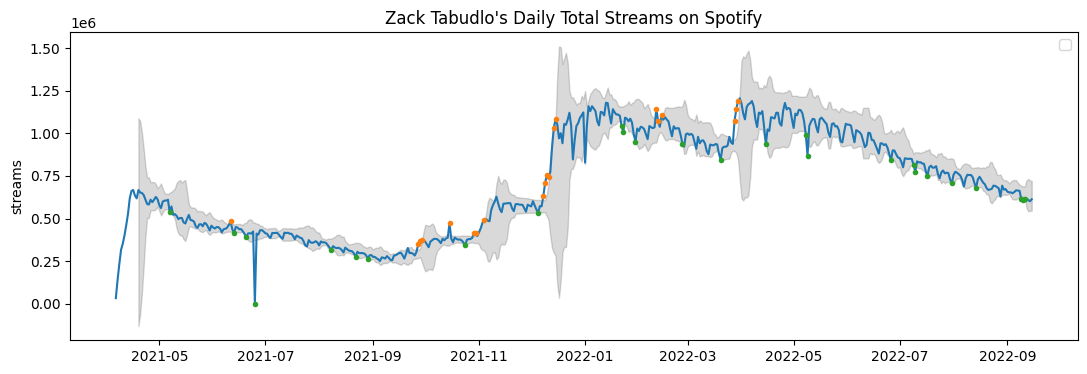

In [47]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

BOUNDS_WINDOW = 14
data = artist_df['streams'].resample('d').sum()
mdn_data = data.rolling(BOUNDS_WINDOW).quantile(0.5)
p75_data = data.rolling(BOUNDS_WINDOW).quantile(0.75)
p25_data = data.rolling(BOUNDS_WINDOW).quantile(0.25)
IQR_data = p75_data - p25_data

lb_data = p25_data-1.5*IQR_data
ub_data = p75_data+1.5*IQR_data

#outliers
data_above_ub = data[data>ub_data]
data_below_lb = data[data<lb_data]

plt.plot(data)#, label=artist_name)
plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

plt.fill_between(lb_data.index,lb_data,ub_data, color='k',alpha=0.15)
plt.legend()
plt.ylabel('streams')
plt.title(artist_name + "'s Daily Total Streams on Spotify")


In [48]:
import statsmodels.api as sm

In [49]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


<AxesSubplot:xlabel='date'>

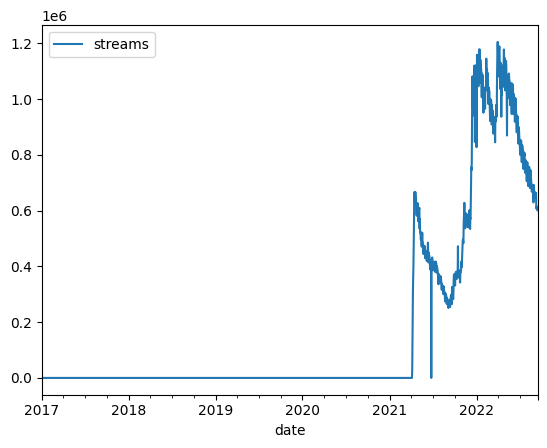

In [50]:
#get all dates
data1 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
#get total streams of all charting songs of the artist per day
artist_streams = df[df['artist']==artist_name].groupby('date')[['streams']].sum()
#merge with complete dates
data1['streams']=artist_streams
#fill days with no streams with 0
data1['streams']=data1['streams'].fillna(0)
data1.plot()

Text(0.5, 1.01, "Zack Tabudlo's Daily Total Streams on Spotify")

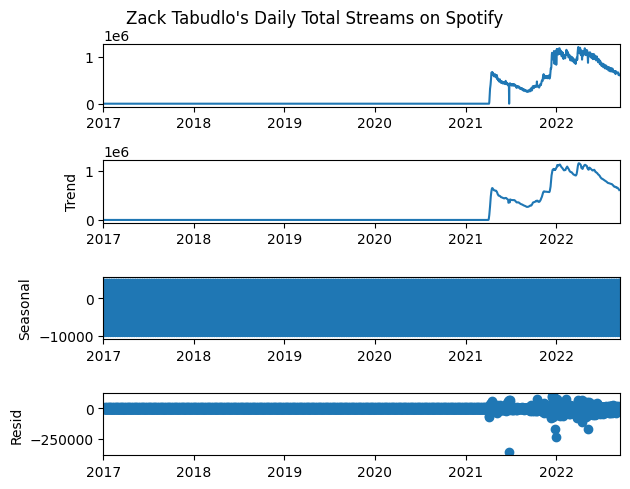

In [51]:
res = sm.tsa.seasonal_decompose(data1)
resplot = res.plot()
plt.suptitle(artist_name + "'s Daily Total Streams on Spotify", y=1.01)

<AxesSubplot:xlabel='date'>

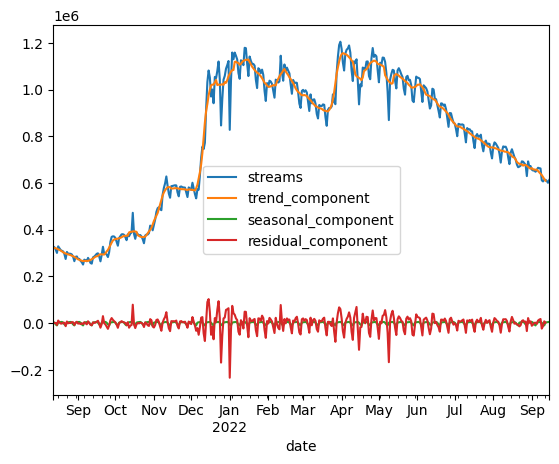

In [52]:
#get each component 
data_decomposed = data1.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid

data_decomposed.tail(400).plot()

<AxesSubplot:xlabel='date'>

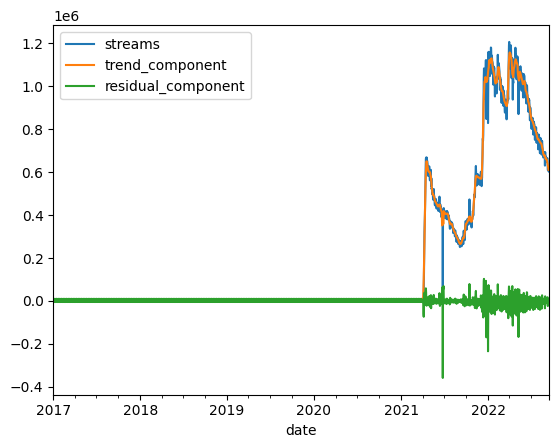

In [53]:
res = sm.tsa.seasonal_decompose(data1['streams'])
data_decomposed = data1.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid
data_decomposed['season_strength'] = data_decomposed['seasonal_component']/data_decomposed['trend_component']
data_decomposed[['streams','trend_component','residual_component']].plot()

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [55]:
artist_name_df = artist_df['streams']
artist_name_df

date
2021-04-06     32457
2021-04-07     70317
2021-04-07     68316
2021-04-08    118157
2021-04-08    113402
               ...  
2022-09-15    129232
2022-09-15    121873
2022-09-15     87255
2022-09-15     70919
2022-09-15     59696
Name: streams, Length: 2479, dtype: int64

<AxesSubplot:xlabel='date'>

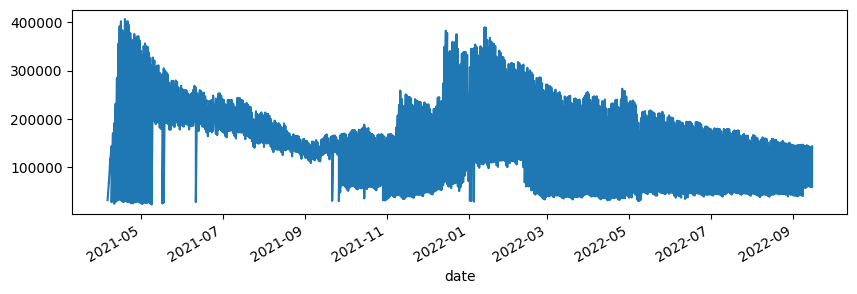

In [56]:
#stationarize
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
artist_name_df.interpolate().plot()